## Identifying Key Market Interest With The Volume Ratio In Python

1.1 Volume’s Role in Stock Analysis
Volume refers to the quantity of shares traded within a designated time frame. It serves as an integral metric, reflective of market activity. High trading volumes typically signify robust market engagement, while disparities or fluctuat/ions in volume might signal notable market deviations to investigate further.

Essentially, volume acts as an indicator of a stock’s momentum. For instance, when there’s substantial price movement accompanied by low volume, it suggests limited market conviction behind that movement. Conversely, a significant price shift backed by high volume indicates a more pronounced and possibly enduring market trend.

1.2 Understanding the Volume Ratio
While raw volume values are informative, they can sometimes give a skewed understanding if analyzed in isolation. The Volume Ratio rectifies this by offering a standardized insight. Conceptually, the calculation is straightforward:

Volume Ratio = Volume / Average Moving Volume

The Volume Ratio evaluates how the current trading volume compares to its recent historical average. This assessment contextualizes volume data, offering insights into the evolving momentum of a stock. The significance of this? Elevated volume ratios can act as precursors to notable stock price shifts.

A volume ratio substantially greater than 1 implies that the trading volume for a given period surpasses its typical range. Such deviations often allude to external events or influences spurring heightened trading, which might precede significant price escalations or reductions.

To put it succinctly, while volume presents a snapshot of market activity, the Volume Ratio delineates its pattern, equipping traders with a deeper understanding of potential anomalies in trading activity

[*********************100%%**********************]  1 of 1 completed


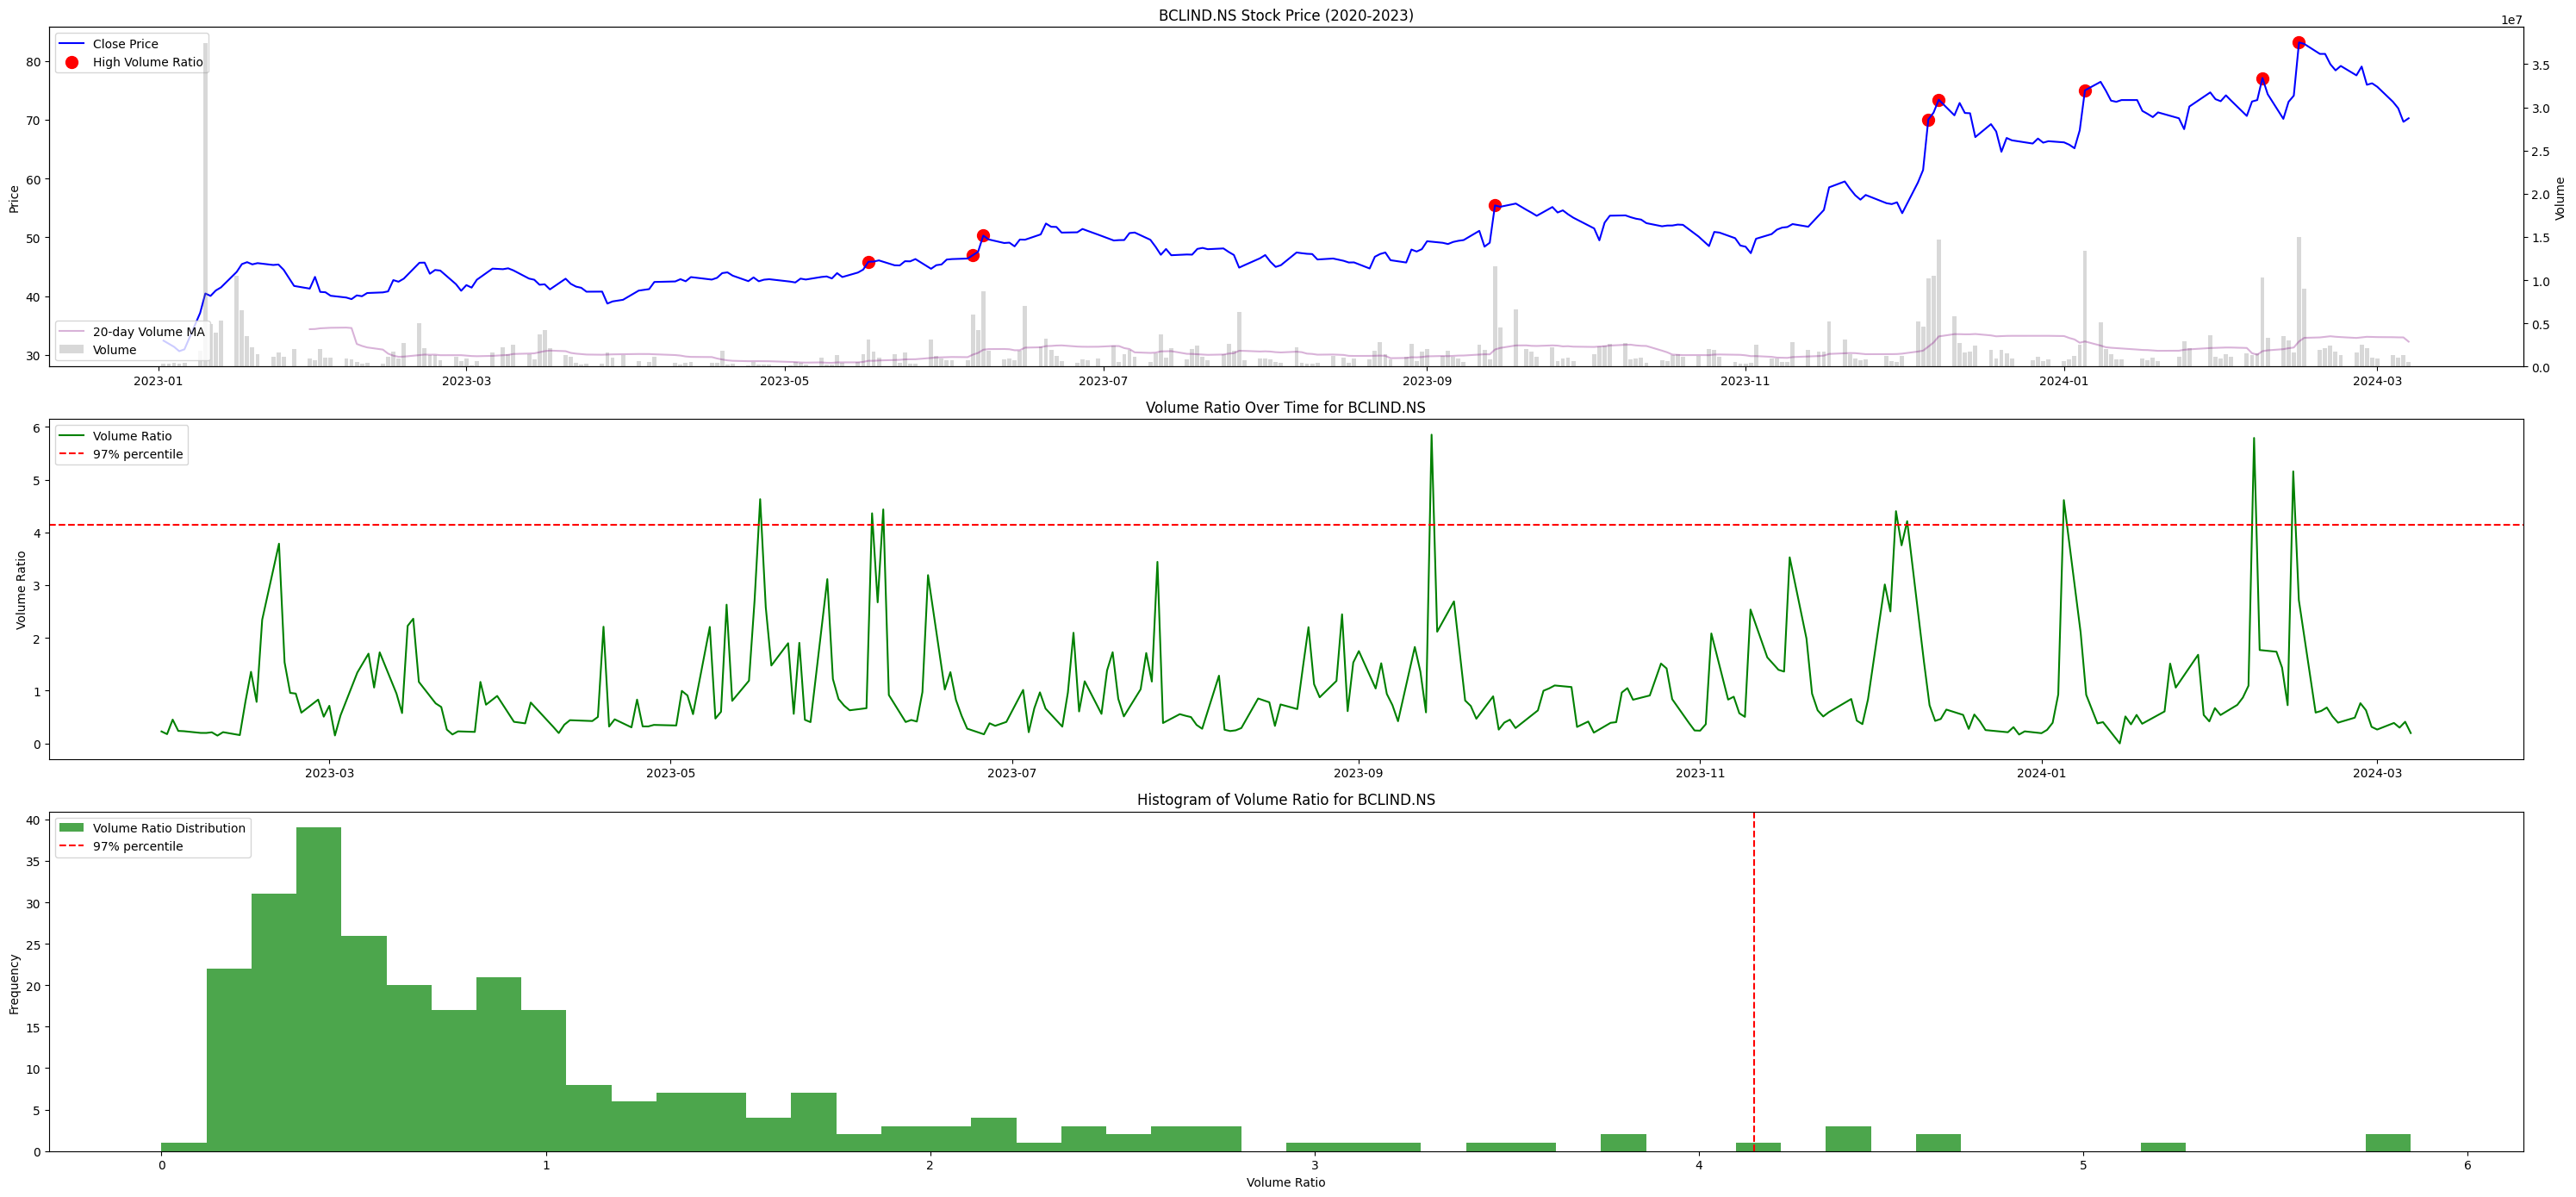

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the ticker and percentile threshold as variables
ticker = 'BCLIND.NS'
percentile_threshold = 0.97

# Fetch the data
data = yf.download(ticker, start='2023-01-01', end='2024-03-11')

# Compute moving averages
data['50_day_MA'] = data['Close'].rolling(window=50).mean()
data['200_day_MA'] = data['Close'].rolling(window=200).mean()

# Compute volume ratio and moving average
data['Volume_MA20'] = data['Volume'].rolling(window=20).mean()
data['Volume_Ratio'] = data['Volume'] / data['Volume_MA20']

# Calculate the dynamic percentile threshold
dynamic_percentile = data['Volume_Ratio'].quantile(percentile_threshold)
mask = data['Volume_Ratio'] > dynamic_percentile

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(30, 14))

# Plot Close Price on ax1
ax1.plot(data.index, data['Close'], label='Close Price', color='blue')
ax1.scatter(data.index[mask], data['Close'][mask], color='red', s=100, label='High Volume Ratio')
ax1.set_title(f'{ticker} Stock Price (2020-2023)')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Create a secondary y-axis for volume
ax1b = ax1.twinx()
ax1b.bar(data.index, data['Volume'], color='gray', alpha=0.3, label='Volume')
ax1b.plot(data.index, data['Volume_MA20'], color='purple', label='20-day Volume MA', alpha=0.3)  # Added line for Volume MA
ax1b.set_ylabel('Volume')
ax1b.legend(loc='lower left')

# Plot Volume Ratio on ax2
ax2.plot(data.index, data['Volume_Ratio'], label='Volume Ratio', color='green')
ax2.axhline(y=dynamic_percentile, color='red', linestyle='--', label=f'{percentile_threshold*100:.0f}% percentile')
ax2.set_title(f'Volume Ratio Over Time for {ticker}')
ax2.set_ylabel('Volume Ratio')
ax2.legend(loc='upper left')

# Plot histogram of Volume Ratio values on ax3
ax3.hist(data['Volume_Ratio'], bins=50, color='green', alpha=0.7, label='Volume Ratio Distribution')
ax3.axvline(x=dynamic_percentile, color='red', linestyle='--', label=f'{percentile_threshold*100:.0f}% percentile')
ax3.set_title(f'Histogram of Volume Ratio for {ticker}')
ax3.set_xlabel('Volume Ratio')
ax3.set_ylabel('Frequency')
ax3.legend(loc='upper left')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Reading the Plots
The generated plots serve as visual instruments to assist in informed decision-making. Proper interpretation is required to extract the most valuable insights:

- Price Evolution Plot: The main line shows the stock’s closing price over the set period. Keep an eye on the red dots, though. They pop up when the volume ratio goes beyond our set limit, hinting at big trading days that could signal important market sentiments or shifts.
- Volume Ratio Over Time: The green line shows the volume ratio over time. The red dashed line is our set limit. When the green line goes above it, that’s when trading kicked up a notch
- Histogram of Volume Ratio: This representation offers a distribution perspective. The majority of trading days will cluster around the mean, but those that veer to the right, especially beyond the red dashed line, are outliers that demand closer attention.